In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('Source/2016_Building_Energy_Benchmarking.csv', sep=",")
df.shape

(3376, 46)

# 1.Data cleaning

In [4]:
# display % missing data per feature
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

OSEBuildingID - 0.0%
DataYear - 0.0%
BuildingType - 0.0%
PrimaryPropertyType - 0.0%
PropertyName - 0.0%
Address - 0.0%
City - 0.0%
State - 0.0%
ZipCode - 0.47393364928909953%
TaxParcelIdentificationNumber - 0.0%
CouncilDistrictCode - 0.0%
Neighborhood - 0.0%
Latitude - 0.0%
Longitude - 0.0%
YearBuilt - 0.0%
NumberofBuildings - 0.23696682464454977%
NumberofFloors - 0.0%
PropertyGFATotal - 0.0%
PropertyGFAParking - 0.0%
PropertyGFABuilding(s) - 0.0%
ListOfAllPropertyUseTypes - 0.2665876777251185%
LargestPropertyUseType - 0.5924170616113744%
LargestPropertyUseTypeGFA - 0.5924170616113744%
SecondLargestPropertyUseType - 50.26658767772511%
SecondLargestPropertyUseTypeGFA - 50.26658767772511%
ThirdLargestPropertyUseType - 82.34597156398105%
ThirdLargestPropertyUseTypeGFA - 82.34597156398105%
YearsENERGYSTARCertified - 96.47511848341233%
ENERGYSTARScore - 24.97037914691943%
SiteEUI(kBtu/sf) - 0.20734597156398105%
SiteEUIWN(kBtu/sf) - 0.17772511848341233%
SourceEUI(kBtu/sf) - 0.266587677725118

In [5]:
# select numeric columns
data_numeric = df.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values

# select non numeric columns
data_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values

In [6]:
data_numeric.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [7]:
data_non_numeric.describe()

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,DefaultData,ComplianceStatus,Outlier
count,3376,3376,3376,3376,3376,3376,3376,3376,3367,3356,1679,596,119,3376,3376,32
unique,8,24,3362,3354,1,1,3268,19,466,56,50,44,65,2,4,2
top,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,1625049001,DOWNTOWN,Multifamily Housing,Multifamily Housing,Parking,Retail Store,2016,False,Compliant,Low outlier
freq,1460,987,3,4,3376,3376,8,573,866,1667,976,110,14,3263,3211,23


### 1.1 [OUTLIER] Clean the unexploitable target values

In [8]:
df[df['SiteEnergyUseWN(kBtu)'] == 0 ]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,...,0.000000e+00,0.0,0.000000,0.0,False,NaN,Missing Data,NaN,0.00,0.00
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,...,4.386917e+05,1496816.0,0.000000,0.0,False,NaN,Missing Data,NaN,10.43,0.20
62,87,2016,SPS-District K-12,K-12 School,Arbor Heights Elementary,3701 S.W. 104th St.,Seattle,WA,98146.0,2518400005,...,1.760881e+05,600813.0,0.000000,0.0,False,NaN,Missing Data,NaN,4.19,0.08
81,118,2016,SPS-District K-12,K-12 School,Pathfinder K-8,1901 SW Genesee St.,Seattle,WA,98106.0,1324039116,...,4.977068e+05,1698176.0,0.000000,0.0,False,NaN,Missing Data,NaN,11.84,0.16
85,122,2016,SPS-District K-12,K-12 School,John Muir Elementary,3301 S. Horton St.,Seattle,WA,98144.0,1524049002,...,6.879069e+05,2347138.0,0.000000,0.0,False,NaN,Missing Data,NaN,16.36,0.28
95,140,2016,SPS-District K-12,K-12 School,B.F. Day Elementary,3921 Linden Ave. N.,Seattle,WA,98103.0,1931301145,...,6.167308e+05,2104286.0,0.000000,0.0,False,NaN,Missing Data,NaN,14.67,0.22
133,217,2016,SPS-District K-12,K-12 School,Whitman Middle,9201 15th Ave. NW.,Seattle,WA,98117.0,3526039131,...,0.000000e+00,0.0,43189.171880,4318917.0,False,NaN,Missing Data,NaN,229.38,1.43
139,227,2016,SPS-District K-12,K-12 School,Washington Middle,2101 S. Jackson,Seattle,WA,98144.0,3646100540,...,0.000000e+00,0.0,32178.773440,3217877.0,False,NaN,Missing Data,NaN,170.90,1.25
152,242,2016,SPS-District K-12,K-12 School,Olympic View Elementary,504 N.E. 95th St.,Seattle,WA,98115.0,5100404840,...,0.000000e+00,0.0,0.000000,0.0,False,NaN,Missing Data,NaN,0.00,0.00
220,343,2016,NonResidential,Large Office,Norton Building,801 2nd Ave Suite 1300,Seattle,WA,98104.0,0939000355,...,4.098788e+06,13985064.0,0.000000,0.0,False,NaN,Compliant,NaN,940.47,2.48


In [9]:
df = df[df['SiteEnergyUseWN(kBtu)'] != 0 ]

### 1.2 [OUTLIER] Clean Electricity outlier

<AxesSubplot:>

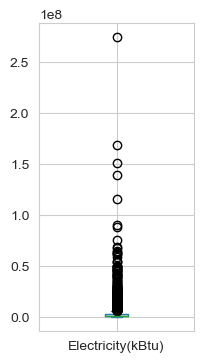

In [10]:
plt.figure(figsize=(2,4))
df['Electricity(kBtu)'].plot(kind='box')

In [11]:
df= df[df['Electricity(kBtu)'] < 17500000]

### 1.3 [CLEANING] Clean the negative values of Target features

In [12]:
df['GHGEmissionsIntensity'][df['GHGEmissionsIntensity'] < 0 ] = 0
df['Electricity(kWh)'][df['Electricity(kWh)'] < 0 ] = 0
df['TotalGHGEmissions'][df['TotalGHGEmissions'] < 0 ] = 0

In [13]:
index = df['Electricity(kBtu)'][df['Electricity(kBtu)'] < 0 ].index.item()
df.loc[index,'Electricity(kBtu)'] = 0
print(df['Electricity(kBtu)'][index])

0.0


### 1.4 [OUTLIER] Clean Outliers based on 'Outlier' columm

In [14]:
df['Outlier'].unique()

array([nan, 'Low outlier', 'High outlier'], dtype=object)

In [15]:
df = df[pd.isna(df['Outlier'])]
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,2.160444e+06,7.371434e+06,47151.816410,4.715182e+06,False,NaN,Compliant,NaN,301.81,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [16]:
print(round(((df['ComplianceStatus'][df['ComplianceStatus'] == 'Non-Compliant']).count() / df['ComplianceStatus'].count() ) * 100,2))
print(round(((df['ComplianceStatus'][df['ComplianceStatus'] == 'Missing Data']).count() / df['ComplianceStatus'].count() ) * 100,2))

0.0
0.0


In [17]:
df = df[~(df['ComplianceStatus'] == 'Non-Compliant')]
df = df[~(df['ComplianceStatus'] == 'Missing Data')]
df.shape

(3192, 46)

### 1.5 [CLEANING] Clean Buildings part of the residential category

In [18]:
def clean_multifamily(dataframe):
    for value in dataframe['PrimaryPropertyType']:
        if 'Multifamily' in value:
            dataframe['PrimaryPropertyType'].drop(value, axis=0)

In [19]:
clean_multifamily(df)

KeyError: "['Mid-Rise Multifamily'] not found in axis"

In [22]:
df['PrimaryPropertyType'].unique().sum()

'HotelOtherMid-Rise MultifamilyMixed Use PropertyK-12 SchoolUniversitySmall- and Mid-Sized OfficeSelf-Storage FacilityLarge OfficeSenior Care CommunityMedical OfficeRetail StoreResidence HallWarehouseDistribution CenterWorship FacilityLow-Rise MultifamilySupermarket / Grocery StoreLaboratoryRefrigerated WarehouseRestaurantHigh-Rise MultifamilyHospitalOffice'

In [23]:
df = df[~df['BuildingType'].str.contains("Multifamily")]
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,2.160444e+06,7.371434e+06,47151.816410,4.715182e+06,False,NaN,Compliant,NaN,301.81,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [24]:
df = df[~(df['PrimaryPropertyType'] == 'Low-Rise Multifamily')]
df[df['PrimaryPropertyType'] == 'Low-Rise Multifamily']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


### 1.6 [NAN CLEANING] Clean Nans within the dataframe

In [25]:
def clean_nan(dataframe):
    data_numeric = dataframe.select_dtypes(include=[np.number])
    numeric_cols = data_numeric.columns.values

    data_non_numeric = dataframe.select_dtypes(exclude=[np.number])
    non_numeric_cols = data_non_numeric.columns.values

    for col_numeric in numeric_cols:
        if col_numeric not in ['SecondLargestPropertyUseType','ZipCode','DataYear','YearBuilt','Latitude','Longitude','CouncilDistrictCode','OSEBuildingID', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','Comments','ThirdLargestPropertyUseTypeGFA']:
            df_wth_nan = dataframe[col_numeric].dropna()
            median = df_wth_nan.median()
            dataframe[col_numeric] = dataframe[col_numeric].fillna(median)
        else:
            dataframe[col_numeric] = dataframe[col_numeric].fillna(0)
    for col_non_numeric in non_numeric_cols:
        if col_non_numeric == 'ListOfAllPropertyUseTypes':
            for i in dataframe.index:
                dataframe[col_non_numeric]= dataframe[col_non_numeric].apply(
                lambda x: dataframe['PrimaryPropertyType'].iloc(i)
                if pd.isna(x)
                else x)
        if col_non_numeric == 'LargestPropertyUseType':
            for i in dataframe.index:
                dataframe[col_non_numeric]= dataframe[col_non_numeric].apply(
                    lambda x: dataframe['PrimaryPropertyType'].iloc(i)
                    if pd.isna(x)
                    else x)

In [26]:
clean_nan(df)

/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_66378/1327783655.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_numeric] = dataframe[col_numeric].fillna(0)
/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_66378/1327783655.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_numeric] = dataframe[col_numeric].fillna(median)
/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_66378/1327783655.py:18: SettingWithCopyWarning: 
A value is trying to be s

In [27]:
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print('{} - {}%'.format(col, pct_missing*100))

OSEBuildingID - 0.0%
DataYear - 0.0%
BuildingType - 0.0%
PrimaryPropertyType - 0.0%
PropertyName - 0.0%
Address - 0.0%
City - 0.0%
State - 0.0%
ZipCode - 0.0%
TaxParcelIdentificationNumber - 0.0%
CouncilDistrictCode - 0.0%
Neighborhood - 0.0%
Latitude - 0.0%
Longitude - 0.0%
YearBuilt - 0.0%
NumberofBuildings - 0.0%
NumberofFloors - 0.0%
PropertyGFATotal - 0.0%
PropertyGFAParking - 0.0%
PropertyGFABuilding(s) - 0.0%
ListOfAllPropertyUseTypes - 0.0%
LargestPropertyUseType - 0.0%
LargestPropertyUseTypeGFA - 0.0%
SecondLargestPropertyUseType - 49.60317460317461%
SecondLargestPropertyUseTypeGFA - 0.0%
ThirdLargestPropertyUseType - 80.29100529100529%
ThirdLargestPropertyUseTypeGFA - 0.0%
YearsENERGYSTARCertified - 95.37037037037037%
ENERGYSTARScore - 0.0%
SiteEUI(kBtu/sf) - 0.0%
SiteEUIWN(kBtu/sf) - 0.0%
SourceEUI(kBtu/sf) - 0.0%
SourceEUIWN(kBtu/sf) - 0.0%
SiteEnergyUse(kBtu) - 0.0%
SiteEnergyUseWN(kBtu) - 0.0%
SteamUse(kBtu) - 0.0%
Electricity(kWh) - 0.0%
Electricity(kBtu) - 0.0%
NaturalG

##### [COMMENT] Seul les Outlier, Second & Third largest Property Use Type contiennent des Nans - toutes les autres features sont clean. Ces 3 features ne seront pas retenues par la suite pour entrainer les modeles.

# 2. Feature Engeneering

## 2.1 Transformation / Mutation

In [28]:
df['ProportionParkingGFA'] = df['PropertyGFAParking'] / df['PropertyGFATotal']
# df['Energy_Loss(kBtu/sf)'] =  (df['SourceEUIWN(kBtu/sf)'] - df['SiteEUIWN(kBtu/sf)'] ) / df['SourceEUIWN(kBtu/sf)']

df['ProportionElectricity(kBtu)'] = df['Electricity(kBtu)'] / df['SiteEnergyUse(kBtu)']
df['ProportionNaturalGas(kBtu)'] = df['NaturalGas(kBtu)'] / df['SiteEnergyUse(kBtu)']
df['ProportionSteamUse(kBtu)'] = df['SteamUse(kBtu)'] / df['SiteEnergyUse(kBtu)']

/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_66378/1380467901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ProportionParkingGFA'] = df['PropertyGFAParking'] / df['PropertyGFATotal']
/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_66378/1380467901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ProportionElectricity(kBtu)'] = df['Electricity(kBtu)'] / df['SiteEnergyUse(kBtu)']
/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_66378/1380467901.py:5: Setting

In [29]:
# df['Energy_Loss(kBtu/sf)'][df['Energy_Loss(kBtu/sf)'] < 0] = 0

In [30]:
df['YearBuilt'] = df['DataYear'] - df['YearBuilt']
encoder = LabelEncoder()
df['YearBuilt'] = encoder.fit_transform(df['YearBuilt'])
df

/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_66378/3370219743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearBuilt'] = df['DataYear'] - df['YearBuilt']
/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_66378/3370219743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearBuilt'] = encoder.fit_transform(df['YearBuilt'])


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,ProportionParkingGFA,ProportionElectricity(kBtu),ProportionNaturalGas(kBtu),ProportionSteamUse(kBtu)
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,False,0.0,Compliant,NaN,249.98,2.83,0.000000,0.546060,0.176638,0.277302
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,False,0.0,Compliant,NaN,295.86,2.86,0.145453,0.386609,0.613391,0.000000
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,False,0.0,Compliant,NaN,286.43,4.67,0.000000,0.407519,0.266567,0.325913
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,False,0.0,Compliant,NaN,505.01,2.88,0.353115,0.378802,0.621198,0.000000
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,False,0.0,Compliant,NaN,301.81,3.10,0.382349,0.609884,0.390116,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,0.0,1624049080,...,True,0.0,Error - Correct Default Data,NaN,20.94,1.70,0.000000,0.616974,0.383026,0.000000
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,0.0,3558300000,...,False,0.0,Compliant,NaN,32.17,2.01,0.000000,0.417296,0.582704,0.000000
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,0.0,1794501150,...,False,0.0,Compliant,NaN,223.54,16.99,0.000000,0.310820,0.689180,0.000000
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,0.0,7883603155,...,False,0.0,Compliant,NaN,22.11,1.57,0.000000,0.484898,0.515102,0.000000


In [31]:
df['YearBuilt'].unique()

array([ 85,  19,  86,  35,  16, 108,  46,  84,  90,  82, 105,  96,  54,
        14,  24,  37,  66, 106,  21,  60,  25,  65, 112,  61, 101,  42,
        92, 102,  30, 104,  56,  15,  18,  17,  53,  45,   7,  50,  32,
        83,   5,  76,  29,  13,  89,  12,  58,  26,  51,  73,  52,   9,
        97,  57,   6,   4,  44,   8,  64,  63,  55,  77,  49,  11,  47,
        87,  88,  10,  81,  43,  98,  99,  20,  34, 103,  68,  59, 100,
        38,  91,  31,  27,  70,  36,  41,  33,  69,  48,  28,  74,  62,
        39,  67,  22,  94, 107, 110,  40,  75,  71,  23,  95,  72, 109,
         3,   2,  93, 111,  80,  78,  79,   1,   0])

In [32]:
dummies = pd.get_dummies(df.PrimaryPropertyType)
df= df.join(dummies)
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,0,0,0,0,0,0,0,0,0,0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,0,0,0,0,0,0,0,0,0,0
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,0,0,0,0,0,0,0,0,0,0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,0,0,0,0,0,0,0,0,0,0
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,0.0,1624049080,...,0,0,0,0,0,0,0,0,0,0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,0.0,3558300000,...,0,0,0,0,0,0,0,0,0,0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,0.0,1794501150,...,0,0,0,0,0,0,0,0,0,0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,0.0,7883603155,...,0,0,0,0,0,0,0,0,0,0


## 2.2 Deletion

##### 2.2 [COMMENT] The features with only one value are deleted such as Datayear & City since it is not providing any information to determine the target value.

In [33]:
tmp = df.nunique()
tmp

OSEBuildingID                  1512
DataYear                          1
BuildingType                      5
PrimaryPropertyType              21
PropertyName                   1509
                               ... 
Small- and Mid-Sized Office       2
Supermarket / Grocery Store       2
University                        2
Warehouse                         2
Worship Facility                  2
Length: 71, dtype: int64

In [34]:
cols_1d = tmp[tmp==1].index
df.drop(columns=cols_1d, inplace=True)

##### 2.2 [COMMENT] The below columns are deleted as we consider it does not add more information. We have selected location, size, energy proportion, age, and building type features and deleted the repetitive ones to maintain a reasonable model complexity.

In [35]:
cols = ['OSEBuildingID','CouncilDistrictCode','PropertyName','Address','TaxParcelIdentificationNumber','Neighborhood','ListOfAllPropertyUseTypes','LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','YearsENERGYSTARCertified','SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)','PropertyGFABuilding(s)','Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)','SteamUse(kBtu)','DefaultData','ComplianceStatus','BuildingType','Outlier', 'ZipCode','NumberofBuildings', 'PropertyGFAParking']
df = df.drop(columns=cols)

In [36]:
df = df.reset_index(drop=True)
df

,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,Hotel,47.61220,-122.33799,85,12,88434,60.0,7.456910e+06,249.98,2.83,...,0,0,0,0,0,0,0,0,0,0
1,Hotel,47.61317,-122.33393,19,11,103566,61.0,8.664479e+06,295.86,2.86,...,0,0,0,0,0,0,0,0,0,0
2,Hotel,47.61412,-122.33664,86,10,61320,56.0,6.946800e+06,286.43,4.67,...,0,0,0,0,0,0,0,0,0,0
3,Hotel,47.61375,-122.34047,35,18,175580,75.0,1.465650e+07,505.01,2.88,...,0,0,0,0,0,0,0,0,0,0
4,Other,47.61623,-122.33657,16,2,97288,73.0,1.258171e+07,301.81,3.10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Office,47.56722,-122.31154,25,1,12294,46.0,9.430032e+05,20.94,1.70,...,0,0,0,0,0,0,0,0,0,0
1508,Other,47.59625,-122.32283,11,1,16000,73.0,1.053706e+06,32.17,2.01,...,0,0,0,0,0,0,0,0,0,0
1509,Other,47.63644,-122.35784,41,1,13157,73.0,6.053764e+06,223.54,16.99,...,0,0,0,0,0,0,0,0,0,0
1510,Mixed Use Property,47.52832,-122.32431,26,1,14101,73.0,7.828413e+05,22.11,1.57,...,0,0,0,0,0,0,0,0,0,0


# 4. Visualization

In [37]:
labelencoder = LabelEncoder()
df['PrimaryPropertyType_'] = labelencoder.fit_transform(df['PrimaryPropertyType'])
df

,PrimaryPropertyType,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,...,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility,PrimaryPropertyType_
0,Hotel,47.61220,-122.33799,85,12,88434,60.0,7.456910e+06,249.98,2.83,...,0,0,0,0,0,0,0,0,0,2
1,Hotel,47.61317,-122.33393,19,11,103566,61.0,8.664479e+06,295.86,2.86,...,0,0,0,0,0,0,0,0,0,2
2,Hotel,47.61412,-122.33664,86,10,61320,56.0,6.946800e+06,286.43,4.67,...,0,0,0,0,0,0,0,0,0,2
3,Hotel,47.61375,-122.34047,35,18,175580,75.0,1.465650e+07,505.01,2.88,...,0,0,0,0,0,0,0,0,0,2
4,Other,47.61623,-122.33657,16,2,97288,73.0,1.258171e+07,301.81,3.10,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Office,47.56722,-122.31154,25,1,12294,46.0,9.430032e+05,20.94,1.70,...,0,0,0,0,0,0,0,0,0,8
1508,Other,47.59625,-122.32283,11,1,16000,73.0,1.053706e+06,32.17,2.01,...,0,0,0,0,0,0,0,0,0,9
1509,Other,47.63644,-122.35784,41,1,13157,73.0,6.053764e+06,223.54,16.99,...,0,0,0,0,0,0,0,0,0,9
1510,Mixed Use Property,47.52832,-122.32431,26,1,14101,73.0,7.828413e+05,22.11,1.57,...,0,0,0,0,0,0,0,0,0,7


#### [IMPORTANT] PrimaryPropertyType_ Legend  ↓

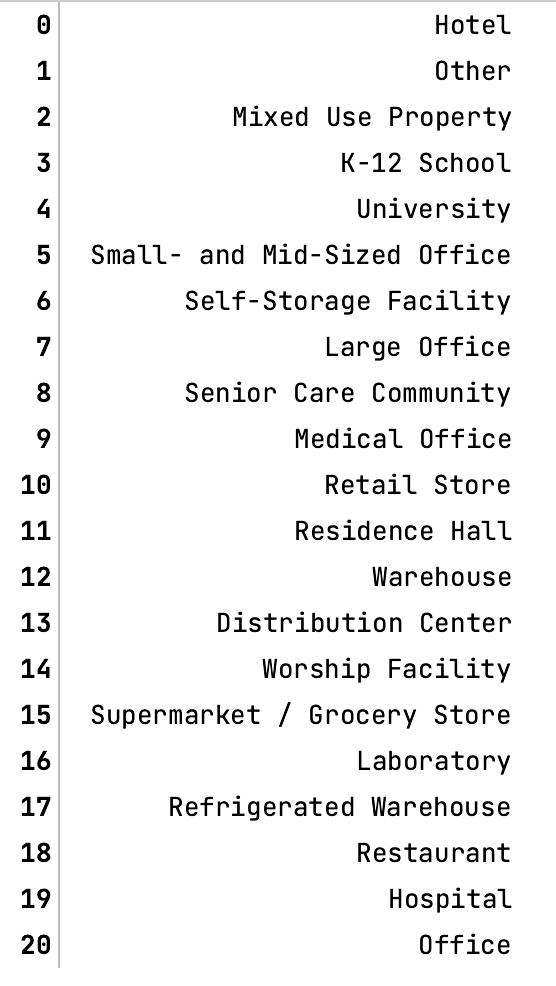

In [37]:
from IPython import display
display.Image("visualization/PrimaryPropertyUse_label.png")

## 4.1 Traget #1: SiteEnergyUseWN (kBtu)

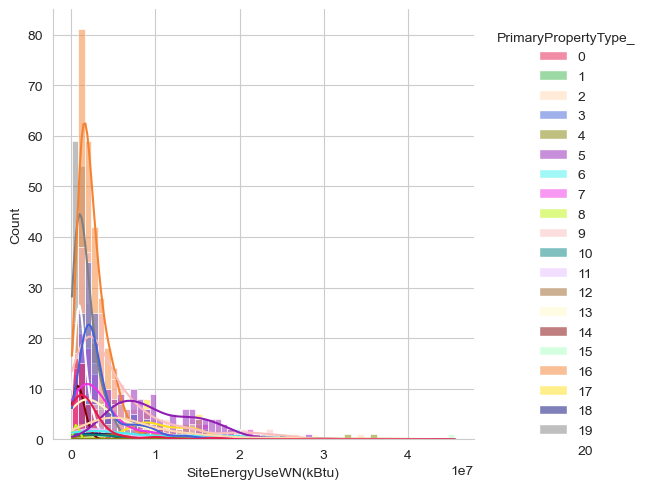

In [38]:
sns.displot(data=df,x="SiteEnergyUseWN(kBtu)", hue="PrimaryPropertyType_", kde=True, palette=['#e6194b', '#3cb44b','#ffd8b1', '#4363d8', '#808000', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3','#f58231','#ffe119', '#000075', '#808080', '#ffffff'])

## 4.1 Traget #2: TotalGHGEmissions

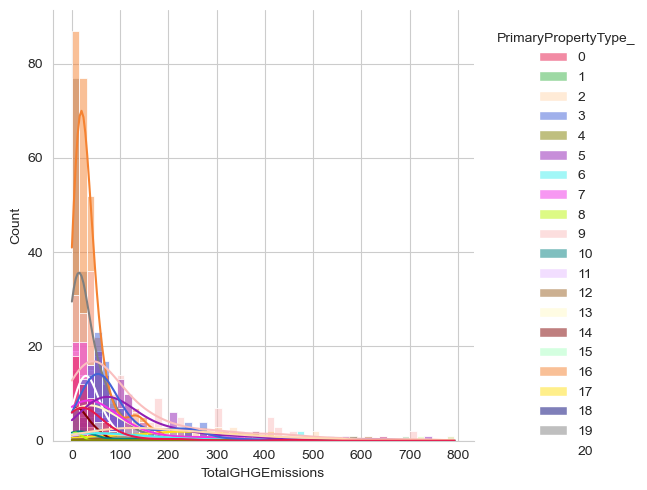

In [39]:
sns.displot(data=df[df["TotalGHGEmissions"] < 800],x="TotalGHGEmissions", hue="PrimaryPropertyType_", kde=True, palette=['#e6194b', '#3cb44b','#ffd8b1', '#4363d8', '#808000', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3','#f58231','#ffe119', '#000075', '#808080', '#ffffff'])

### 4.1 Distribution Analysis per Building type

<AxesSubplot:xlabel='PrimaryPropertyType_', ylabel='TotalGHGEmissions'>

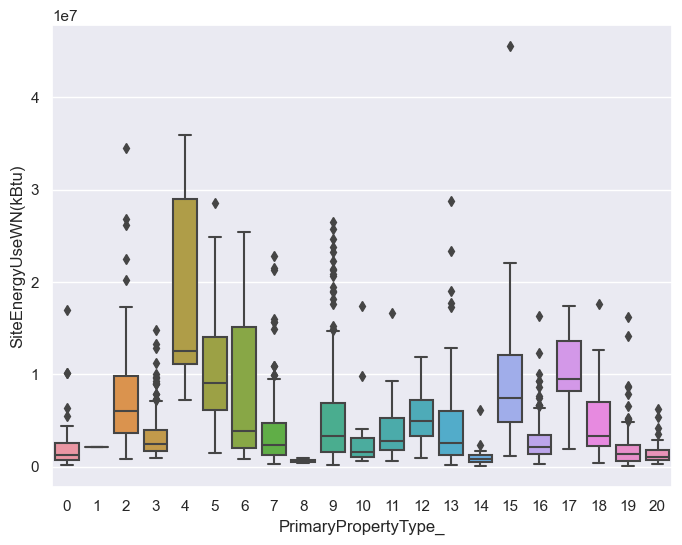

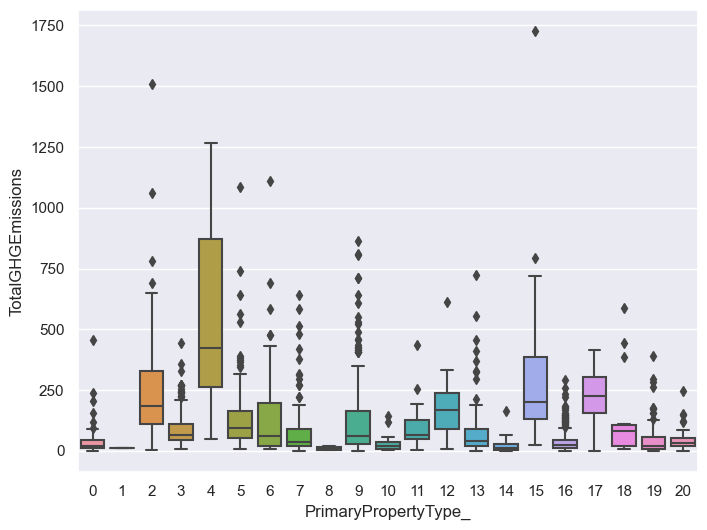

In [40]:
sns.set(font_scale=1)
plt.figure(figsize = (8,6))
sns.boxplot(data=df, x="PrimaryPropertyType_", y="SiteEnergyUseWN(kBtu)")

sns.set(font_scale=1)
plt.figure(figsize = (8,6))
sns.boxplot(data=df, x="PrimaryPropertyType_", y="TotalGHGEmissions")

<AxesSubplot:>

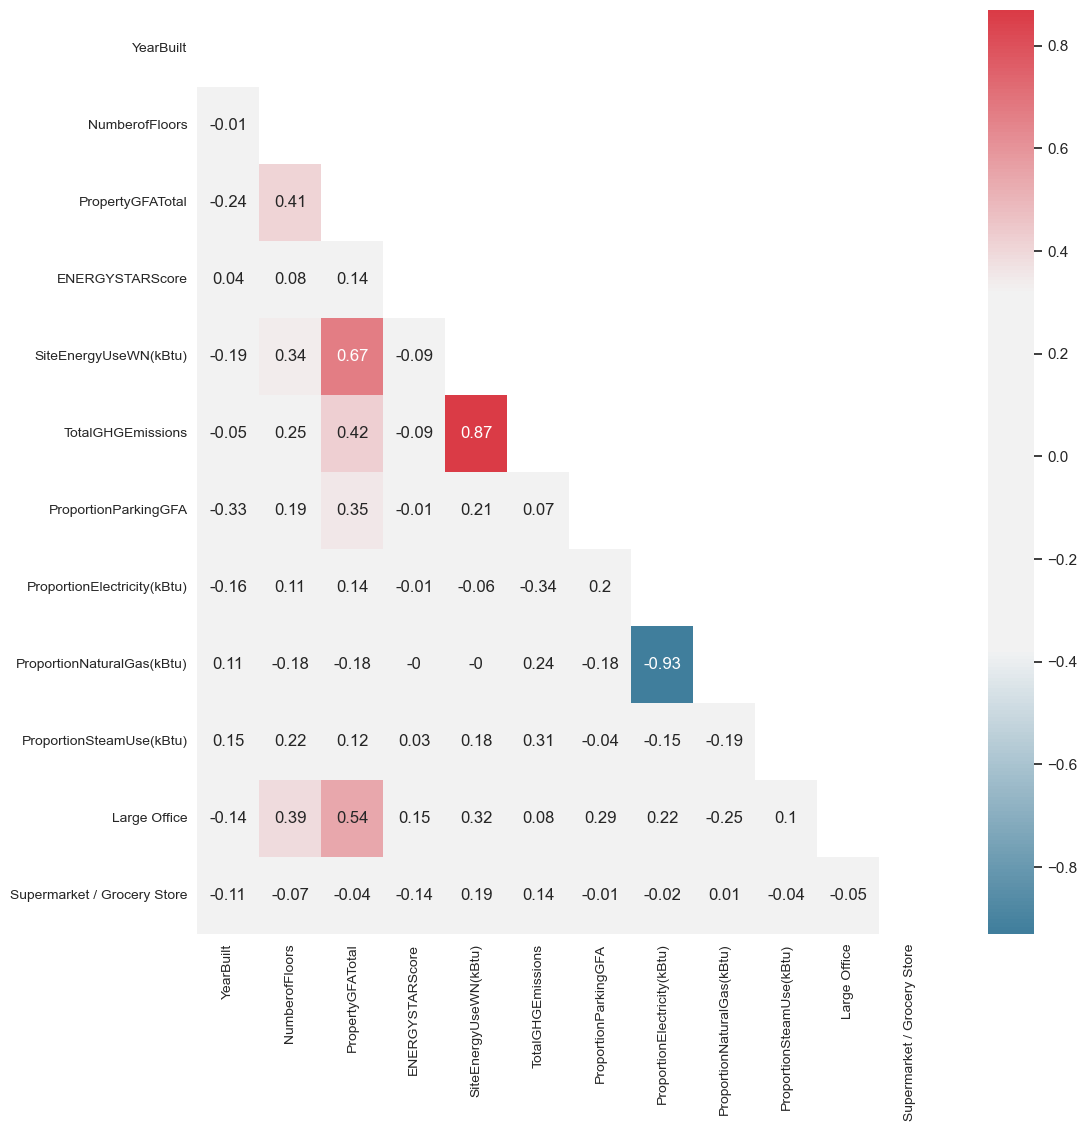

In [38]:
df_heatmap = df.drop(labels=['GHGEmissionsIntensity','PrimaryPropertyType_','Latitude','Longitude','Distribution Center','Mixed Use Property','Hotel','Laboratory','Office','Restaurant','Residence Hall','Senior Care Community','University','Self-Storage Facility','Retail Store','Hospital','Refrigerated Warehouse','Small- and Mid-Sized Office','Warehouse','Worship Facility','K-12 School','Other','Medical Office'], axis=1, inplace=False)

corr = round(df_heatmap.corr(),2)
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12,12))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, val=True)

# Custom diverging colormap
cmap = sns.diverging_palette(230, 10, as_cmap=True, sep=100)
cmap.set_bad('white')

# Draw the heatmap
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
df_mapbox = df[df['SiteEnergyUseWN(kBtu)'] < 32000000]

fig = px.scatter_mapbox(df_mapbox,lat=df_mapbox['Latitude'],lon=df_mapbox['Longitude'], hover_name=df_mapbox["PrimaryPropertyType"], color=df_mapbox['SiteEnergyUseWN(kBtu)'],color_continuous_scale=px.colors.sequential.Hot_r, size=df_mapbox["PropertyGFATotal"],size_max=25, height=600, zoom=11)

# color_discrete_sequence=[df['YearBuilt']],

fig.update_layout(title = 'Seattle map', title_x=0.5)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [39]:
df = df.drop(columns=["PrimaryPropertyType_","PrimaryPropertyType",'Latitude','Longitude'])

In [40]:
df.describe()

,YearBuilt,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ProportionParkingGFA,ProportionElectricity(kBtu),ProportionNaturalGas(kBtu),...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
count,1512.000000,1512.000000,1512.000000,1512.000000,1.512000e+03,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,...,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,53.455026,3.269841,77731.783069,67.968915,4.550323e+06,99.250417,1.550198,0.056945,0.687561,0.290543,...,0.013889,0.007937,0.058201,0.018519,0.012566,0.189153,0.026455,0.010582,0.123016,0.044312
std,31.559226,4.153245,85204.015042,23.071574,5.161670e+06,150.165287,2.118703,0.138635,0.265611,0.265853,...,0.117069,0.088762,0.234201,0.134861,0.111429,0.391760,0.160537,0.102357,0.328564,0.205856
min,0.000000,0.000000,11285.000000,1.000000,5.811420e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,28561.750000,62.000000,1.296400e+06,19.547500,0.360000,0.000000,0.475400,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,2.000000,45558.000000,73.000000,2.498122e+06,46.485000,0.880000,0.000000,0.689125,0.266535,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,4.000000,89364.250000,81.000000,5.754571e+06,110.670000,1.862500,0.000000,0.999326,0.505374,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,112.000000,99.000000,861702.000000,100.000000,4.554725e+07,1727.110000,25.710000,0.895023,1.000003,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Data exportation to CSV

#### 3.1 Data check for infinite values

In [41]:
print()
print("checking for infinity")

ds = df.isin([np.inf, -np.inf])
print(ds)

# printing the count of infinity values
print()
print("printing the count of infinity values")

count = np.isinf(df).values.sum()
print("It contains " + str(count) + " infinite values")

# counting infinity in a particular column name
for col in df.columns:
    c = np.isinf(df[col]).values.sum()
    print(col + "It contains " + str(c) + " infinite values")

# printing column name where infinity is present
print()
print("printing column name where infinity is present")
col_name = df.columns.to_series()[np.isinf(df).any()]
print(col_name)

# printing row index with infinity
print()
print("printing row index with infinity ")

r = df.index[np.isinf(df).any(1)]
print(r)


checking for infinity
      YearBuilt  NumberofFloors  PropertyGFATotal  ENERGYSTARScore  \
0         False           False             False            False   
1         False           False             False            False   
2         False           False             False            False   
3         False           False             False            False   
4         False           False             False            False   
...         ...             ...               ...              ...   
1507      False           False             False            False   
1508      False           False             False            False   
1509      False           False             False            False   
1510      False           False             False            False   
1511      False           False             False            False   

      SiteEnergyUseWN(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  \
0                     False              False                 

In [42]:
df.shape

(1512, 32)

In [43]:
df.to_csv('data/df_cleaned.csv', index=False)